In [ ]:
pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pathlib
data_dir = "/content/drive/MyDrive/Tomat"
data_dir = pathlib.Path(data_dir)

In [ ]:
# Menghitung jumlah gambar pada dataset
number_label = {}
total_files = 0
for i in os.listdir(data_dir):
    counting = len(os.listdir(os.path.join(data_dir, i)))
    number_label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

Total Files : 720


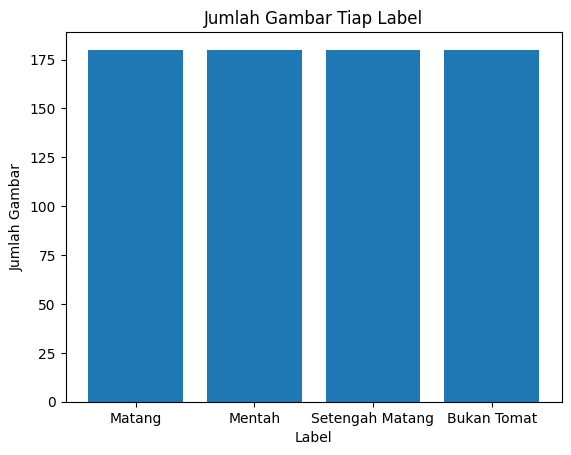

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt

plt.bar(number_label.keys(), number_label.values());
plt.title("Jumlah Gambar Tiap Label");
plt.xlabel('Label');
plt.ylabel('Jumlah Gambar');

In [ ]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 999

##Melakukan Validation Spli. 70% untuk Train 30% untuk Validation

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory( #Sudah membagi otomatis
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=SEED,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 720 files belonging to 4 classes.
Using 576 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=SEED,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 720 files belonging to 4 classes.
Using 144 files for validation.


In [ ]:
# **2️⃣ Simpan class names sebelum mapping dataset**
class_names = train_ds.class_names
num_classes = len(class_names)
print("Class Names:", class_names)


Class Names: ['Bukan Tomat', 'Matang', 'Mentah', 'Setengah Matang']


In [ ]:
import os
import shutil
import numpy as np
from PIL import Image

# Direktori untuk menyimpan gambar validasi
validation_dir = 'validation_images'

# Hapus direktori jika sudah ada sebelumnya
if os.path.exists(validation_dir):
    shutil.rmtree(validation_dir)

# Buat direktori baru
os.makedirs(validation_dir)

# Iterasi melalui setiap kelas
for class_idx, class_name in enumerate(val_ds.class_names):
    # Buat subdirektori untuk kelas ini
    class_dir = os.path.join(validation_dir, class_name)
    os.makedirs(class_dir)

    # Iterasi melalui setiap gambar dalam kelas ini
    for image_tensor, label_tensor in val_ds:
        label = label_tensor.numpy()
        if np.array_equal(label, class_idx):
            # Simpan gambar ke subdirektori kelas
            image = image_tensor.numpy()
            file_name = f"{class_idx}_{int(image.sum())}.jpg"
            file_path = os.path.join(class_dir, file_name)
            image.reshape(IMAGE_SIZE + (3,)).astype('uint8').tofile(file_path)

            # Pengecekan tambahan
            print(f"Gambar disimpan: {file_path}")
            try:
                Image.open(file_path).verify()
                print("Gambar berhasil disimpan dan dibuka.")
            except Exception as e:
                print(f"Gagal membuka gambar: {e}")

In [ ]:
#Visualisasikan Data
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


##Standarisasi Data

In [ ]:
# normalization_layer = layers.Rescaling(1./255)
# normalization_layer

In [ ]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))

# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

##Augumentasi Data

In [ ]:
# Image Augmentation
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(IMAGE_SIZE[0],
                                  IMAGE_SIZE[1],
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
    # tf.keras.layers.Rescaling(1./255)
  ]
)

In [ ]:
# plt.figure(figsize=(10, 10))
# for images, _ in train_ds.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy().astype("uint8"))
#     plt.axis("off")

##Model CNN

In [ ]:
# num_classes = len(class_names)
# model = Sequential([
#   data_augmentation,
#   layers.Rescaling(1./255),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Membuat arsitektur model CNN
cnn_model = tf.keras.models.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(4, activation='softmax')
])

checkpoint_path = "./best_model.keras"

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_loss', # Metric to monitor
                             verbose=1,
                             save_best_only=True, # Only save the best model
                             mode='min'
)

# Compiling model
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(learning_rate=0.0001),
    metrics=['accuracy'],
)


##Latih Model

In [ ]:
# optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001)
# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

In [ ]:
# Training model CNN
cnn_hist = cnn_model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/50
18/18 [==============================] - ETA: 0s - loss: 8.7297 - accuracy: 0.3472
Epoch 1: val_loss improved from inf to 1.26158, saving model to ./best_model.keras
18/18 [==============================] - 72s 3s/step - loss: 8.7297 - accuracy: 0.3472 - val_loss: 1.2616 - val_accuracy: 0.6042
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 1.4119 - accuracy: 0.5903
Epoch 2: val_loss improved from 1.26158 to 0.54274, saving model to ./best_model.keras
18/18 [==============================] - 65s 3s/step - loss: 1.4119 - accuracy: 0.5903 - val_loss: 0.5427 - val_accuracy: 0.8125
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.8778 - accuracy: 0.6719
Epoch 3: val_loss did not improve from 0.54274
18/18 [==============================] - 65s 3s/step - loss: 0.8778 - accuracy: 0.6719 - val_loss: 0.6288 - val_accuracy: 0.7083
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 0.6329 - accuracy: 0.7743
Epoch 4: val_loss im

In [ ]:
from tensorflow.keras.models import load_model

# Load the pre-trained model
cnn_model = load_model('/content/best_model.keras')

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=SEED,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

cnn_model.evaluate(val_ds)

Found 720 files belonging to 4 classes.
Using 216 files for validation.
7/7 [==============================] - 10s 566ms/step - loss: 0.0502 - accuracy: 0.9722


[0.05020945519208908, 0.9722222089767456]

In [ ]:
# Extract training history
history = cnn_hist.history

# Get the highest validation accuracy
best_epoch = history['val_accuracy'].index(max(history['val_accuracy']))
best_val_accuracy = history['val_accuracy'][best_epoch]
best_train_accuracy = history['accuracy'][best_epoch]

# Format the accuracies to 4 decimal places
best_val_accuracy_formatted = f"{best_val_accuracy:.4f}"
best_train_accuracy_formatted = f"{best_train_accuracy:.4f}"

print(f"Epoch dengan akurasi validasi tertinggi: {best_epoch + 1}")
print(f"Training Accuracy pada epoch terbaik: {best_train_accuracy_formatted}")
print(f"Validation Accuracy pada epoch terbaik: {best_val_accuracy_formatted}")

Epoch dengan akurasi validasi tertinggi: 22
Training Accuracy pada epoch terbaik: 0.9583
Validation Accuracy pada epoch terbaik: 0.9792


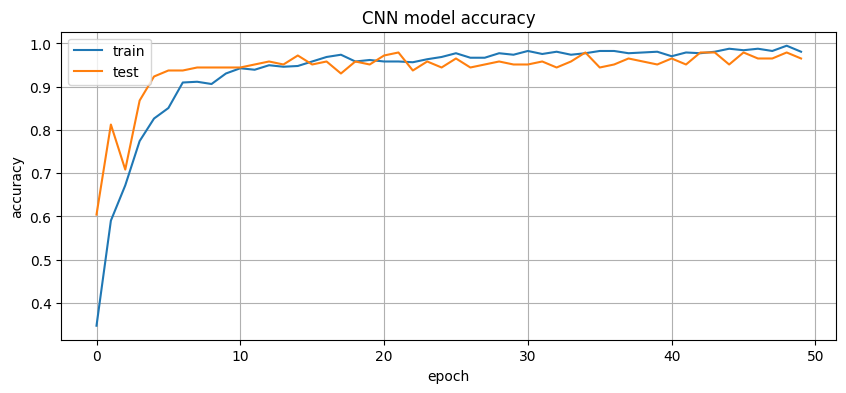

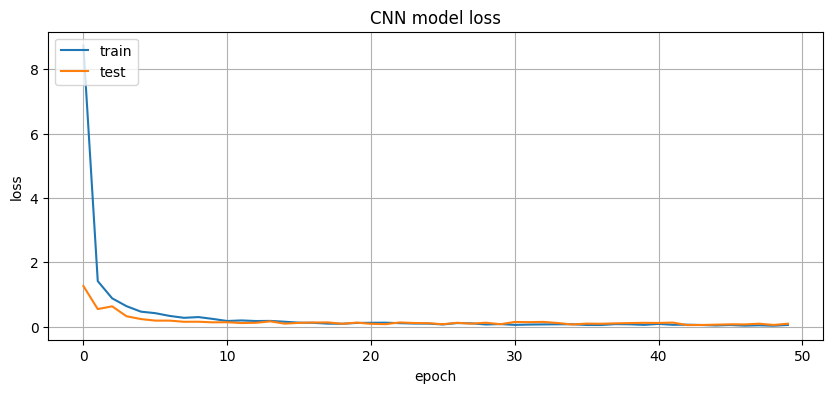

In [ ]:
# Membuat plot akurasi model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['accuracy'])
plt.plot(cnn_hist.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model CNN
plt.figure(figsize=(10,4))
plt.plot(cnn_hist.history['loss'])
plt.plot(cnn_hist.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
cnn_model.save('model-tomatos2-vanilla.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

# Loading VGG16 model
base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
base_vgg_model.trainable = False

# base_vgg_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# base_vgg_model.trainable = False  # Bekukan seluruh layer awal

# Preprocessing Input
# vgg_preprocess = tf.keras.applications.vgg16.preprocess_input
# train_ds.preprocessing_function = vgg_preprocess


def preprocess(image, label):
    image = tf.keras.applications.vgg16.preprocess_input(image)  # Normalisasi sesuai VGG16
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Transfer learning dengan VGG16
# vgg_model = tf.keras.models.Sequential([
#   data_augmentation,
#   base_vgg_model,
#   tf.keras.layers.Dropout(0.7),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(64, activation='relu'),
#   tf.keras.layers.Dense(5, activation='softmax')
# ])


# vgg_model.summary()

vgg_model = tf.keras.models.Sequential([
    data_augmentation,
    base_vgg_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Ganti Flatten dengan pooling agar lebih stabil
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),  # Dropout lebih kecil untuk mengurangi overfitting
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output sesuai jumlah kelas
])
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                      

In [ ]:
# Compiling model
vgg_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # LR dinaikkan sedikit untuk dataset kecil
    metrics=['accuracy']
)

# Learning Rate Scheduler
# lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
# )

# Melatih model VGG16

# vgg_hist = vgg_model.fit(
#     train_ds,
#     epochs=50,
#     validation_data=val_ds,
#     callbacks=[lr_schedule]
# )
vgg_hist = vgg_model.fit(
    train_ds,
    epochs=50,
    validation_data = val_ds
)

Epoch 1/50
18/18 [==============================] - 347s 18s/step - loss: 5.4800 - accuracy: 0.3003 - val_loss: 3.8368 - val_accuracy: 0.3403
Epoch 2/50
18/18 [==============================] - 343s 18s/step - loss: 4.2133 - accuracy: 0.2951 - val_loss: 2.5882 - val_accuracy: 0.4028
Epoch 3/50
18/18 [==============================] - 348s 18s/step - loss: 3.4935 - accuracy: 0.3142 - val_loss: 1.8971 - val_accuracy: 0.4792
Epoch 4/50
18/18 [==============================] - 347s 18s/step - loss: 2.4605 - accuracy: 0.4306 - val_loss: 1.4201 - val_accuracy: 0.5694
Epoch 5/50
18/18 [==============================] - 340s 18s/step - loss: 2.0766 - accuracy: 0.4774 - val_loss: 1.1358 - val_accuracy: 0.6389
Epoch 6/50
18/18 [==============================] - 345s 18s/step - loss: 1.9830 - accuracy: 0.5347 - val_loss: 0.9345 - val_accuracy: 0.6875
Epoch 7/50
18/18 [==============================] - 338s 18s/step - loss: 1.6496 - accuracy: 0.5903 - val_loss: 0.7537 - val_accuracy: 0.7431
Epoch 

In [ ]:
# Extract training history
history_vgg = vgg_hist.history

# Get the highest validation accuracy
best_epoch = history_vgg['val_accuracy'].index(max(history_vgg['val_accuracy']))
best_val_accuracy = history_vgg['val_accuracy'][best_epoch]
best_train_accuracy = history_vgg['accuracy'][best_epoch]

# Format the accuracies to 4 decimal places
best_val_accuracy_formatted = f"{best_val_accuracy:.4f}"
best_train_accuracy_formatted = f"{best_train_accuracy:.4f}"

print(f"Epoch dengan akurasi validasi tertinggi: {best_epoch + 1}")
print(f"Training Accuracy pada epoch terbaik: {best_train_accuracy_formatted}")
print(f"Validation Accuracy pada epoch terbaik: {best_val_accuracy_formatted}")

Epoch dengan akurasi validasi tertinggi: 40
Training Accuracy pada epoch terbaik: 0.9219
Validation Accuracy pada epoch terbaik: 0.9653


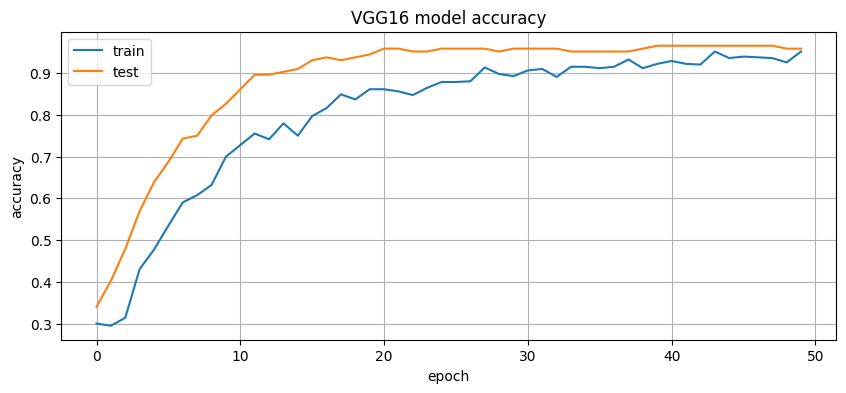

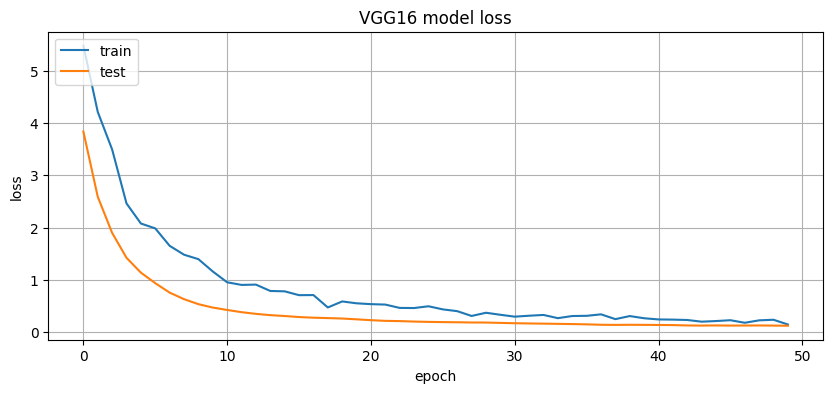

In [ ]:
# Membuat plot akurasi model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['accuracy'])
plt.plot(vgg_hist.history['val_accuracy'])
plt.title('VGG16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat plot loss model VGG16
plt.figure(figsize=(10,4))
plt.plot(vgg_hist.history['loss'])
plt.plot(vgg_hist.history['val_loss'])
plt.title('VGG16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(vgg_hist.history['accuracy'], label='Train Accuracy')
# plt.plot(vgg_hist.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.title("Akurasi Model")

# plt.subplot(1, 2, 2)
# plt.plot(vgg_hist.history['loss'], label='Train Loss')
# plt.plot(vgg_hist.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.title("Loss Model")
# plt.show()

In [ ]:
vgg_model.save('model-tomatos2-vgg_hahahue.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# # Menampilkan daftar kelas atau label gambar
# train_ds.class_indices

In [ ]:
# model.summary()

In [ ]:
# epochs = 5
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

##Visualisasi hasil Training

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

##Prediksi Data Baru

In [ ]:
# img_path ="/content/drive/MyDrive/Tomat/Setengah Matang/1 (1).jpg"

# img = tf.keras.utils.load_img(
#     img_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# # print(img_array.shape)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
# # print(img_array.shape)

In [ ]:
# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])
# print(train_ds.class_names[np.argmax(score)])

In [ ]:
# model.save("my_model.keras") #Save Model yang telah di training

###LOAD DATA


In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import PIL
# import tensorflow as tf

# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# model = keras.models.load_model('/content/best_model.keras')

In [ ]:
# import os
# import numpy as np
# from keras.preprocessing import image
# import matplotlib.pyplot as plt

# # Direktori yang berisi gambar validasi
# folder_path = ('val_ds')

# # Ukuran gambar yang digunakan untuk melatih model
# IMAGE_SIZE = (224, 224)

# # Memuat model yang telah dilatih sebelumnya
# from keras.models import load_model
# cnn_model = load_model('/content/best_model.keras')

# # Daftar ekstensi file gambar yang valid
# valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

# # Filter untuk hanya mendapatkan file gambar
# image_files = [fn for fn in os.listdir(folder_path) if os.path.splitext(fn)[1].lower() in valid_extensions]

# # Menentukan jumlah kolom dan baris subplot
# num_cols = 5
# num_rows = (len(image_files) + num_cols - 1) // num_cols

# fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

# for i, fn in enumerate(image_files):
#     # Predicting images
#     path = os.path.join(folder_path, fn)
#     img = image.load_img(path, target_size=IMAGE_SIZE)
#     ax = axes[i // num_cols, i % num_cols]
#     ax.imshow(img)
#     ax.axis('off')
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
#     classes = cnn_model.predict(images, batch_size=1, verbose=0)
#     classes = np.argmax(classes, axis=-1)
#     if classes[0] == 0:
#         prediction = 'Matang'
#     elif classes[0] == 1:
#         prediction = 'Mentah'
#     else:
#         prediction = 'Setengah Matang'
#     ax.set_title(prediction)
#     ax.text(0.5, -0.1, fn, ha='center', transform=ax.transAxes)

# plt.tight_layout()
# plt.show()